In [3]:
import pandas as pd
import numpy as np

In [21]:
dataframe = pd.read_csv("LD2011_2014.txt", delimiter = ';')

C:\Users\shumi\AppData\Local\Temp\ipykernel_11928\319661521.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,125,126,127,128,129,130,131,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,157,160,164,165,167,170,173,177,178,179,181,184,185,186,223,224,255,280,289,305,308,322,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,363,364,365,366,367,368,369,370) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = pd.read_csv("LD2011_2014.txt", delimiter = ';')


,Unnamed: 0,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
0,2011-01-01 00:15:00,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
1,2011-01-01 00:30:00,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
2,2011-01-01 00:45:00,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
3,2011-01-01 01:00:00,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
4,2011-01-01 01:15:00,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140251,2014-12-31 23:00:00,"2,53807106598985","22,0483641536273","1,73761946133797","150,406504065041","85,3658536585366","303,571428571429","11,3058224985868","282,828282828283","68,1818181818182",...,"276,945039257673",28200.0,"1616,03375527426","1363,63636363636","29,986962190352","5,85137507314219","697,102721685689","176,961602671119","651,026392961877","7621,62162162162"
140252,2014-12-31 23:15:00,"2,53807106598985","21,3371266002845","1,73761946133797","166,666666666667","81,7073170731707","324,404761904762","11,3058224985868","252,525252525253","64,6853146853147",...,"279,800142755175",28300.0,"1569,62025316456","1340,90909090909","29,986962190352","9,94733762434172","671,641791044776","168,614357262104","669,354838709677","6702,7027027027"
140253,2014-12-31 23:30:00,"2,53807106598985","20,6258890469417","1,73761946133797","162,60162601626","82,9268292682927","318,452380952381","10,1752402487281","242,424242424242","61,1888111888112",...,"284,796573875803",27800.0,"1556,96202531646","1318,18181818182","27,3794002607562","9,3622001170275","670,763827919227","153,589315525876","670,087976539589","6864,86486486487"
140254,2014-12-31 23:45:00,"1,26903553299492","21,3371266002845","1,73761946133797","166,666666666667","85,3658536585366","285,714285714286","10,1752402487281","225,589225589226","64,6853146853147",...,"246,252676659529",28000.0,"1443,03797468354","909,090909090909","26,0756192959583","4,09596255119953","664,618086040386","146,911519198664","646,627565982405","6540,54054054054"


In [52]:
# Example: day_avg['2011-01-01'] = [6852976.48136047, 15010]
# Example: month_avg['2011-01'] = [340961519.22020435, 470050]
day_avg = dict()
month_avg = dict()

for index, row in dataframe.iterrows():
    date = row['Unnamed: 0'].split(" ")[0]
    month = row['Unnamed: 0'].split(" ")[0][:7]
    if date not in day_avg.keys():
        # [total use, count]
        day_avg[date] = [0,0]
    if month not in month_avg.keys():
        month_avg[month] = [0,0]

    for use in row[1:]:
        if use != 0:
            if type(use) == type("a"):
                day_avg[date][0] += float(use.replace(",", "."))
                month_avg[month][0] += float(use.replace(",", "."))
            else:
                day_avg[date][0] += use
                month_avg[month][0] += use
            day_avg[date][1] += 1
            month_avg[month][1] += 1

In [53]:
df_daily = pd.DataFrame({"Date": day_avg.keys(), "Avg_KW": [i[0]/i[1] for i in day_avg.values()]})
df_monthly = pd.DataFrame({"Month": month_avg.keys(), "Avg_KW": [i[0]/i[1] for i in month_avg.values()]})
print(df_daily.head())
print(df_monthly.head())

         Date      Avg_KW
0  2011-01-01  456.560725
1  2011-01-02  734.529667
2  2011-01-03  741.631857
3  2011-01-04  756.056362
4  2011-01-05  759.608856
     Month      Avg_KW
0  2011-01  725.372874
1  2011-02  726.909133
2  2011-03  724.464337
3  2011-04  774.406700
4  2011-05  806.880913


In [59]:
# Drop data for 2015, increase all indexed by 1
df_daily_new = df_daily[:-1]
df_daily_new.index += 1
df_monthly_new = df_monthly[:-1]
df_monthly_new.index += 1
client_daily = client_daily[:-1]
client_monthly = client_monthly[:-1]

<AxesSubplot: title={'center': 'Visualization for Avg Monthly Usage'}, xlabel='Months', ylabel='Kw'>

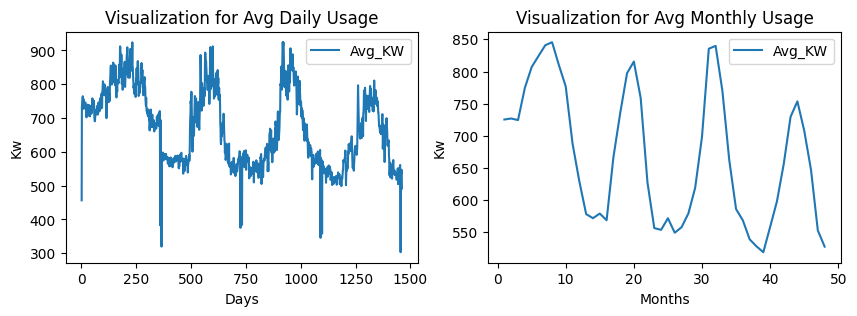

In [55]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
df_daily_new.plot(ax=axes[0], title="Visualization for Avg Daily Usage", xlabel=("Days"), ylabel="Kw")
df_monthly_new.plot(ax=axes[1], title="Visualization for Avg Monthly Usage", xlabel=("Months"), ylabel="Kw")

In [61]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss

In [62]:
# Stationality test
kpss_results = kpss(df_daily["Avg_KW"], regression="ct")
print("Test statistics: {}".format(kpss_results[0]))
print("P_values: {}".format(kpss_results[1]))
print("Critical values: {}".format(kpss_results[-1]))

Test statistics: 0.16535251093540454
P_values: 0.033872907553829545
Critical values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


In [63]:
# Stationality test
kpss_results = kpss(df_monthly["Avg_KW"], regression="c")
print("Test statistics: {}".format(kpss_results[0]))
print("P_values: {}".format(kpss_results[1]))
print("Critical values: {}".format(kpss_results[-1]))

Test statistics: 0.40303503170399524
P_values: 0.07584696909310551
Critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


*From the results above we can see time series for average daily usage is non-stationary, times series for average monthly usage is stationary*

In [120]:
# Apply ARIMA on average monthly usage
from statsmodels.tsa.arima.model import ARIMA

model1 = ARIMA(df_monthly_new["Avg_KW"], order=[1,0,0], seasonal_order=[1,0,0,12], trend="t")
results1 = model1.fit()

In [121]:
def mape(actual, forecast):
    total = 0
    for i in range(actual.size):
        total += np.abs((actual[i+2]-forecast[i+2])/actual[i+2])
    return total/len(actual)

In [122]:
monthly_forecast_values = results1.predict(start=1, end=len(df_monthly_new)-1)
model1_mape = mape(df_monthly_new["Avg_KW"][1:], monthly_forecast_values)
print("Mean absolute percentage error for ARIMA model is: {}".format(model1_mape))

Mean absolute percentage error for ARIMA model is: 0.045020634346929087


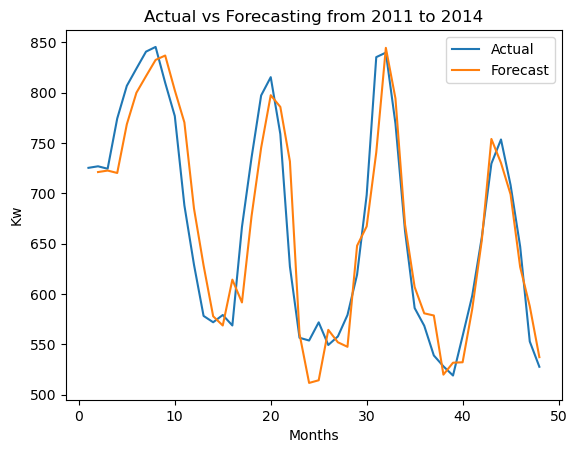

In [133]:
plt.plot(df_monthly_new["Avg_KW"], label="Actual")
plt.plot(monthly_forecast_values, label="Forecast")
plt.xlabel("Months")
plt.ylabel("Kw")
plt.title("Actual vs Forecasting from 2011 to 2014")
plt.legend()
plt.show()

<AxesSubplot: title={'center': 'Forecasting Avg Monthly Usage in 2015 Using ARIMA'}, xlabel='Months', ylabel='Kw'>

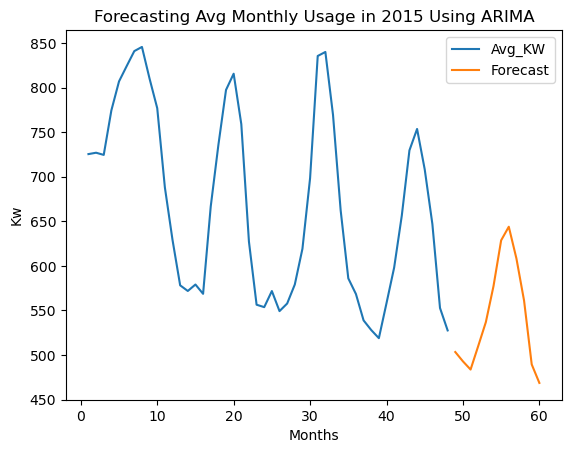

In [135]:
df_monthly_forcast = pd.DataFrame({"Forecast":results1.predict(start=len(df_monthly_new), end=len(df_monthly_new)+11)})
pd.concat([df_monthly_new, df_monthly_forcast]).plot(title=("Forecasting Avg Monthly Usage in 2015 Using ARIMA"),xlabel=("Months"), ylabel=("Kw"))

In [125]:
print(df_monthly_new.tail())
print(df_monthly_forcast.head())
print(df_monthly_forcast.tail())

      Month      Avg_KW
44  2014-08  753.554485
45  2014-09  708.237897
46  2014-10  647.052095
47  2014-11  552.814059
48  2014-12  527.659139
      Forecast
49  503.441369
50  492.983089
51  483.781966
52  510.139722
53  537.001500
      Forecast
56  643.912484
57  608.290681
58  561.040243
59  489.545952
60  468.790422


In [126]:
# Apply SARIMAX on average daily usage
from statsmodels.tsa.statespace.sarimax import SARIMAX

model2 = SARIMAX(df_daily_new["Avg_KW"], order=[1,0,0], seasonal_order=[1,0,0,365], trend="ct")
results2 = model2.fit()

In [127]:
daily_forecast_values = results2.predict(start=1, end=len(df_daily_new)-1)
model2_mape = mape(df_daily_new["Avg_KW"][1:], daily_forecast_values)
print("Mean absolute percentage error for SARIMAX model is: {}".format(model2_mape))

Mean absolute percentage error for SARIMAX model is: 0.02715302673859511


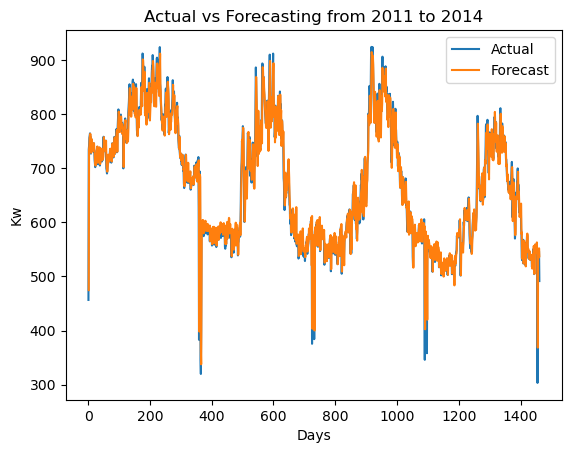

In [128]:
plt.plot(df_daily_new["Avg_KW"], label="Actual")
plt.plot(daily_forecast_values, label="Forecast")
plt.xlabel("Days")
plt.ylabel("Kw")
plt.title("Actual vs Forecasting from 2011 to 2014")
plt.legend()
plt.show()

<AxesSubplot: title={'center': 'Forecasting Avg Daily Usage in 2015 Using SARIMAX'}, xlabel='Days', ylabel='Kw'>

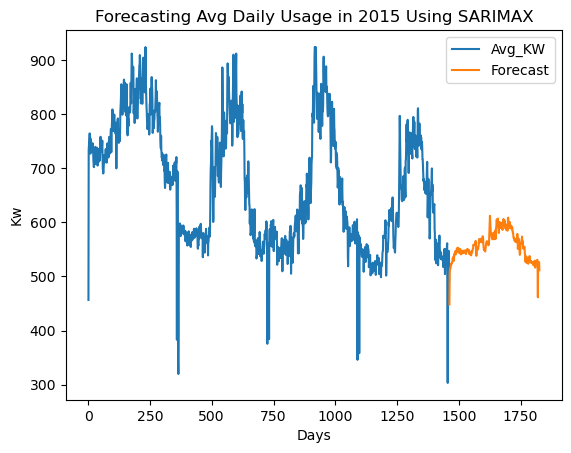

In [131]:
df_daily_forcast = pd.DataFrame({"Forecast":results2.predict(start=len(df_daily_new), end=len(df_daily_new)+364)})
pd.concat([df_daily_new, df_daily_forcast]).plot(title=("Forecasting Avg Daily Usage in 2015 Using SARIMAX"),xlabel=("Days"), ylabel=("Kw"))

In [132]:
print(df_daily_new.tail())
print(df_daily_forcast.head())
print(df_daily_forcast.tail())

            Date      Avg_KW
1457  2014-12-27  538.474602
1458  2014-12-28  536.008238
1459  2014-12-29  546.968393
1460  2014-12-30  547.049623
1461  2014-12-31  491.480908
        Forecast
1462  448.049316
1463  501.915750
1464  512.598354
1465  514.133492
1466  514.100566
        Forecast
1822  524.297615
1823  523.542771
1824  526.383953
1825  526.311432
1826  511.334176
